In [1]:
!pip install statannot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from statannot import add_stat_annotation

%matplotlib inline

stomata = pd.read_csv('Stomata_data.csv')

  Using cached statannot-0.2.3-py3-none-any.whl (10 kB)


In [2]:
print(stomata)

   Col-0_22  4b-03_22  vcs6-1_22  Col-0_29  4b-03_29  vcs6-1_29
0        22        26        9.0        21        26         14
1        16        32       19.0        19        25         11
2        29        26       10.0        20        15         10
3        25        32       21.0        19        19         11
4        23        25       15.0        23        26          7
5        30        21       15.0        26        25         12
6        26        33        NaN        18        32         22
7        15        23        NaN        19        27          8
8        34        21        NaN        22        19          6


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Col-0_22 v.s. 4b-03_22: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-8.072e-01
4b-03_22 v.s. vcs6-1_22: t-test independent samples with Bonferroni correction, P_val=6.223e-03 stat=4.701e+00
4b-03_29 v.s. vcs6-1_29: t-test independent samples with Bonferroni correction, P_val=9.575e-04 stat=5.360e+00
vcs6-1_22 v.s. Col-0_29: t-test independent samples with Bonferroni correction, P_val=1.104e-01 stat=-3.172e+00
Col-0_29 v.s. 4b-03_29: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.563e+00
Col-0_22 v.s. vcs6-1_22: t-test independent samples with Bonferroni correction, P_val=1.083e-01 stat=3.182e+00
4b-03_22 v.s. Col-0_29: t-test independent samples with Bonferroni correction, P_val=7.785e-02 stat=3.234e+00
vcs6-1_22 v.s. 4b-03_29: t-test independent samples with Bo

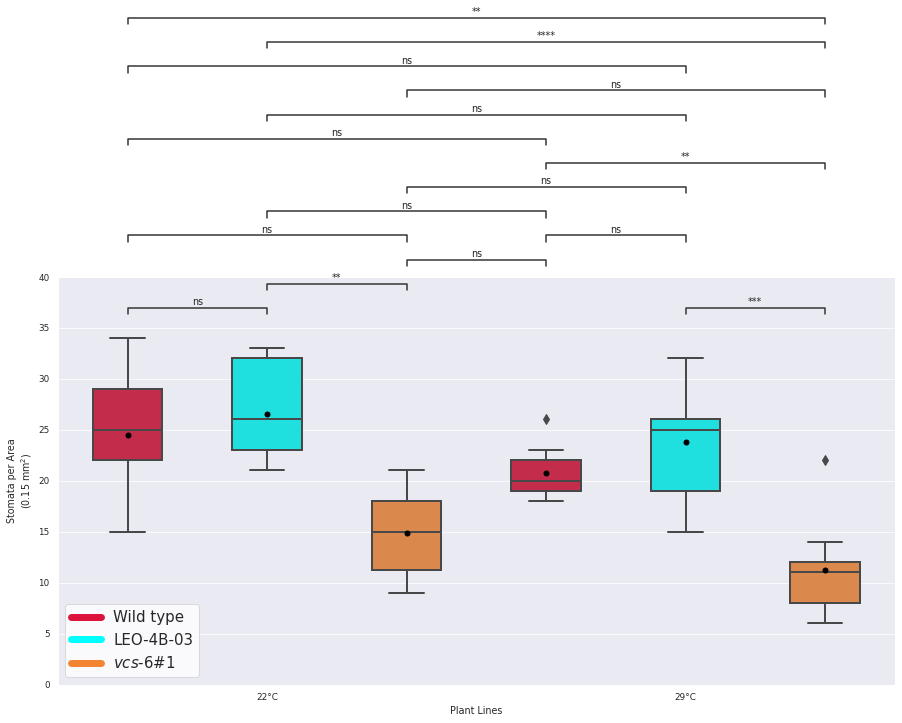

In [13]:
sns.set(font_scale=1.25)
sns.set_style('darkgrid')
plt.figure(figsize=(15,7.5))
sns.set_context('paper', font_scale=1) #fontscale = 3 used in BA

palette = ['crimson', 'cyan','#f38434', 'crimson', 'cyan','#f38434']

ax = sns.boxplot(x="variable", 
            y="value", 
            data=pd.melt(stomata), 
            width=0.5, 
            linewidth=2, 
            fliersize=7,
            whis=1,
            palette=palette,
            showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor":"black",
                       "markeredgecolor": "black",
                       "markersize": "5"}
                )

add_stat_annotation(ax, 
                    data=stomata, 
                    box_pairs=[("Col-0_22", "4b-03_22"), ("Col-0_22", "vcs6-1_22"), ("Col-0_22", "Col-0_29"), ("Col-0_22", "4b-03_29"), ("Col-0_22", "vcs6-1_29"),
                               ("4b-03_22", "vcs6-1_22"), ("4b-03_22", "Col-0_29"), ("4b-03_22", "4b-03_29"), ("4b-03_22", "vcs6-1_29"), ("4b-03_29", "vcs6-1_29"),
                               ("vcs6-1_22", "Col-0_29"), ("vcs6-1_22", "4b-03_29"), ("vcs6-1_22", "vcs6-1_29"), ("Col-0_29", "vcs6-1_29"), ("Col-0_29","4b-03_29") ],
                    test='t-test_ind',
                    loc='outside'
                    )

custom_lines = [Line2D([0], [0], color='crimson', lw=7),
                Line2D([0], [0], color='cyan', lw=7),
                Line2D([0], [0], color='#f38434', lw=7)]

ax.legend(custom_lines, ['Wild type', 'LEO-4B-03', '$\it{vcs}$-6#1'], loc=0, fontsize = 15,  facecolor = 'white') #loc = 1 used for BA


plt.xlabel('Plant Lines')           
plt.ylabel('Stomata per Area\n(0.15 mm$^2$)')
plt.ylim(0,40)
plt.xticks([1,4],['22°C','29°C'])
#plt.tight_layout()
plt.savefig('stomata_count.png', dpi=300)
plt.show()


In [4]:
stomata.describe()

Col-0_22   4b-03_22  vcs6-1_22   Col-0_29   4b-03_29  vcs6-1_29
count   9.000000   9.000000   6.000000   9.000000   9.000000   9.000000
mean   24.444444  26.555556  14.833333  20.777778  23.777778  11.222222
std     6.267199   4.719934   4.750439   2.538591   5.166667   4.763869
min    15.000000  21.000000   9.000000  18.000000  15.000000   6.000000
25%    22.000000  23.000000  11.250000  19.000000  19.000000   8.000000
50%    25.000000  26.000000  15.000000  20.000000  25.000000  11.000000
75%    29.000000  32.000000  18.000000  22.000000  26.000000  12.000000
max    34.000000  33.000000  21.000000  26.000000  32.000000  22.000000